In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("insurance.csv")

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
#number of rows and columns
df.shape

(1338, 7)

In [5]:
#get some info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
#checking for missing value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
#data analysis

#statistical measure of the dataset

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
import seaborn as sns

In [9]:
import matplotlib.pyplot as plt

<Figure size 432x432 with 0 Axes>

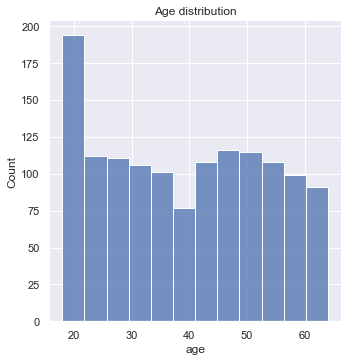

In [10]:
#distribution of age value
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['age'])
plt.title('Age distribution')
plt.show()

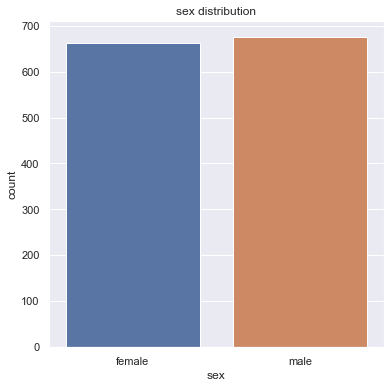

In [11]:
#GEnder column
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=df)
plt.title('sex distribution')
plt.show()

In [12]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

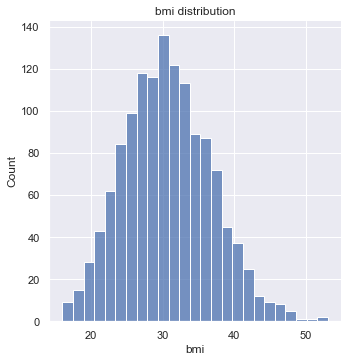

In [13]:
#bmi distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['bmi'])
plt.title('bmi distribution')
plt.show()

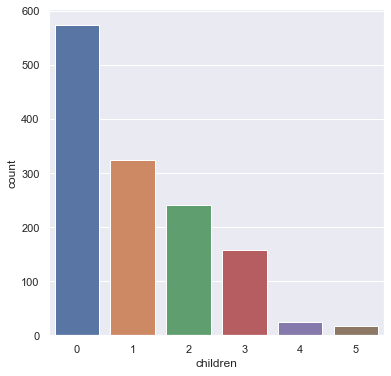

In [14]:
#children column 
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=df)
plt.show()

In [15]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

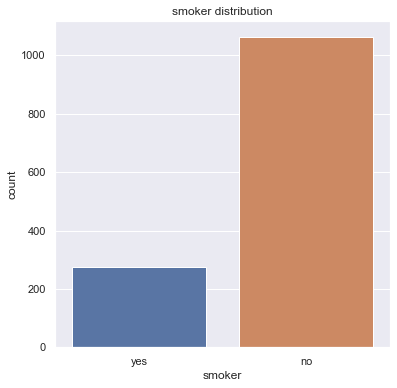

In [16]:
#GEnder column
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=df)
plt.title('smoker distribution')
plt.show()

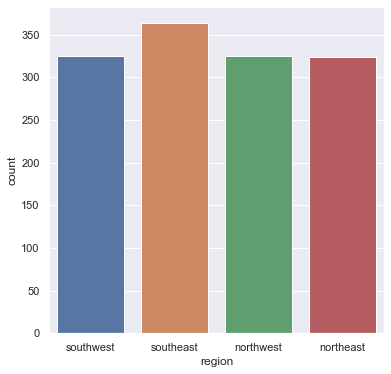

In [17]:
#region column
sns.set()
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=df)
plt.show()

In [18]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

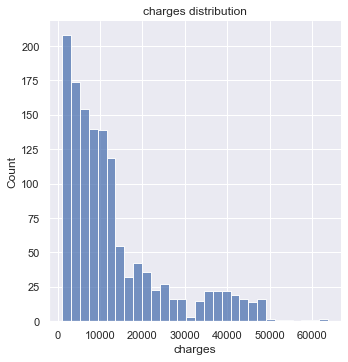

In [19]:
#charges distribution
sns.set()
plt.figure(figsize=(6,6))
sns.displot(df['charges'])
plt.title('charges distribution')
plt.show()

data-encoding

encoding categorical feature

In [20]:
df.replace({'sex':{'male':0,'female':1}},inplace=True)

In [21]:
df.replace({'smoker':{'yes':0,'no':1}},inplace=True)

In [22]:
df.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [23]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [24]:
x=df.drop(columns='charges',axis=1)
y=df['charges']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,2
4,32,0,28.880,0,1,2
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2
1334,18,1,31.920,0,1,3
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [27]:
y


0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [28]:
#splitting features and targe
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [29]:
print(x.shape,x_train.shape,x_test.shape)

(1338, 6) (1070, 6) (268, 6)


# model training

linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
#loading the linearregression model
regressor=LinearRegression()


In [32]:
regressor.fit(x_train, y_train)

LinearRegression()

model evaluation

In [33]:
from sklearn import metrics

In [34]:
#prediction traning data
training_data_prediction= regressor.predict(x_train)

In [35]:
#R_squared value#performance metrics
r2_train = metrics.r2_score(y_train,training_data_prediction)
print('r2_squared value:',r2_train)

r2_squared value: 0.7518195459072953


In [36]:
#prediction on test data

test_data_prediction = regressor.predict(x_test)

In [37]:
#prediction test data
r2_test = metrics.r2_score(y_test,test_data_prediction)
print('r2_squared value:',r2_test)

r2_squared value: 0.7454471618659975


# Building predictive system

In [48]:
import numpy as np

In [51]:
input_data = (18,0,33.77,1,1,0)

# changing input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = regressor.predict(input_data_reshaped)
print(prediction)

print('The insurance cost is USD ', prediction[0])

[3604.42332729]
The insurance cost is USD  3604.4233272949377


C:\Users\91928\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [47]:
input_data = (19,1,27.9,0,0,2)
#changining input data to  numpyarray
input_data_as_numpy_arry = np.asarray(input_data)
#reshape the array
input_data_reshaped = input_data_as_numpy_arry.reshape(1,-1) 
#prediction
prediction = regressor.predict(input_data_reshaped)
print(prediction)
print('The insurance cost:',prediction[0])

[25847.79611591]
The insurance cost: 25847.79611591483


C:\Users\91928\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [42]:
#reshape the array
input_data_reshaped = input_data_as_numpy_arry.reshape(1,-1) 

In [43]:
#prediction
prediction = regressor.predict(input_data_reshaped)
print(prediction)

[3632.02043291]


C:\Users\91928\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [44]:
print('The insurance cost:',prediction[0])

The insurance cost: 3632.0204329083645


In [45]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,2,21984.47061
4,32,0,28.880,0,1,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,2,10600.54830
1334,18,1,31.920,0,1,3,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500
